In [13]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ, execute
from qiskit.tools.monitor import job_monitor
from qiskit import Aer
from qiskit.tools.jupyter.library import _generate_circuit_library_visualization
from qiskit.circuit.library import QFT
import numpy as np

In [14]:
pi = np.pi

In [15]:
backend = Aer.get_backend('statevector_simulator')

In [23]:
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')
circuit = QuantumCircuit(q,c)
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])
circuit &= QFT(num_qubits=5, approximation_degree=0, do_swaps=True,inverse=False,insert_barriers=False, name="qft")
circuit.measure(q,c)
circuit.draw(output="mpl", filename="qft1.png").show()

C:\Users\Samarth\AppData\Local\Temp\ipykernel_22076\2899627844.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  circuit.draw(output="mpl", filename="qft1.png").show()


In [17]:
print(circuit)
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
print("\n QFT Output")
print("-------------")
print(counts)

     ┌───┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤M├────────────
     └───┘│      │└╥┘┌─┐         
q_1: ─────┤1     ├─╫─┤M├─────────
     ┌───┐│      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════╩══╩══╩══╩══╩═
                   0  1  2  3  4 
Job Status: job has successfully run

 QFT Output
-------------
{'10110': 30, '11111': 32, '11001': 30, '00000': 32, '00110': 31, '01111': 47, '11100': 40, '01001': 31, '00010': 23, '10001': 25, '11110': 39, '01011': 37, '10011': 33, '01000': 37, '00111': 29, '10000': 28, '00001': 36, '01101': 28, '01010': 30, '01110': 31, '11011': 27, '00100': 31, '11010': 29, '10101': 27, '11000': 32, '11101': 38, '00101': 26, '10111': 21, '01100': 35, '10010': 23, '10100': 39, '00011': 23}


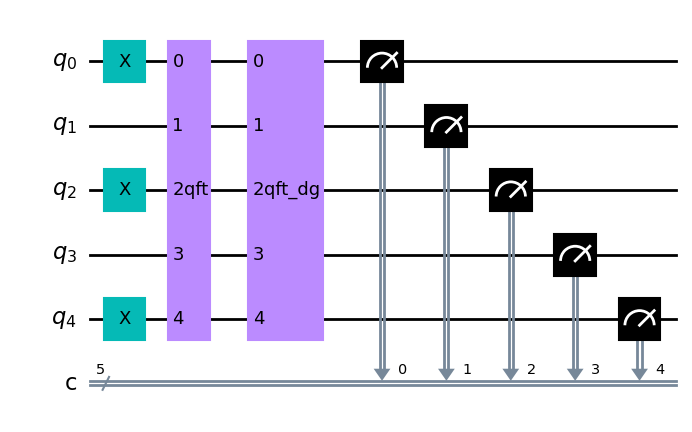

In [22]:
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')
circuit = QuantumCircuit(q,c)
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])
circuit &= QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=True, name='qft')
circuit &= QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='qft')
circuit.measure(q,c)
circuit.draw(output='mpl',filename='qft2.png')

In [19]:
print(circuit)

     ┌───┐┌──────┐┌─────────┐┌─┐            
q_0: ┤ X ├┤0     ├┤0        ├┤M├────────────
     └───┘│      ││         │└╥┘┌─┐         
q_1: ─────┤1     ├┤1        ├─╫─┤M├─────────
     ┌───┐│      ││         │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├┤2 qft_dg ├─╫──╫─┤M├──────
     └───┘│      ││         │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├┤3        ├─╫──╫──╫─┤M├───
     ┌───┐│      ││         │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├┤4        ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘└─────────┘ ║  ║  ║  ║ └╥┘
c: 5/═════════════════════════╩══╩══╩══╩══╩═
                              0  1  2  3  4 


In [20]:
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
print("\n QFT with inverse QFT Output")
print("------------------------------")
print(counts)

Job Status: job has successfully run

 QFT with inverse QFT Output
------------------------------
{'10101': 1000}
